# Info
Purpose:

    To build up the ORACLES all years summary of the AOD, and ACAOD, uncertainty. Pulling out all the different uncertainty calculations

Input:

    None

Output:

    Figure and save files

Keywords:

    none

Dependencies:

    - load_utils.py
    - matplotlib
    - numpy
    - Sp_parameters
    - write_utils
    - path_utils
    - hdf5storage
    - scipy

Needed Files:
  - file.rc : for consistent creation of look of matplotlib figures
  - starsun.mat files for ORACLES

Modification History:

    Written: Samuel LeBlanc, Santa Cruz, CA, 2022-10-24
    Modified:


# Prepare python environment

In [2]:
import numpy as np
import Sp_parameters as Sp
import load_utils as lu
import write_utils as wu
from path_utils import getpath
import hdf5storage as hs
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib notebook
import os
import glob

In [3]:
name = 'ORACLES'
vv = 'v1'
fp = getpath(name)
fp_sun = getpath('sunsat')

Return path named:  ORACLES /data/sam/ORACLES/
Return path named:  sunsat /data/sunsat/


# Load files

## Load the ict files

### 2016

In [4]:
vv6 = 'R4'
ar6 = hs.loadmat(fp+'/aod_ict/R4/all_aod_ict_{}_2016.mat'.format(vv6))

In [5]:
ar6['flac'] = (ar6['qual_flag']==0)&(ar6['flag_acaod']==1)
ar6['flacr'] = (ar6['qual_flag']==0)&(ar6['flag_acaod']==1)&(ar6['fl_routine'])
ar6['flaco'] = (ar6['qual_flag']==0)&(ar6['flag_acaod']==1)&~(ar6['fl_routine'])
ar6['flr'] = (ar6['qual_flag']==0) & (ar6['fl_routine'])
ar6['flo'] = (ar6['qual_flag']==0) & ~(ar6['fl_routine'])
ar6['fl'] = (ar6['qual_flag']==0)

### 2017

In [6]:
vv7 = 'R1'
ar7 = hs.loadmat(fp+'/aod_ict_2017/R1/all_aod_ict_{}_2017.mat'.format(vv7))

In [7]:
ar7['flac'] = (ar7['qual_flag']==0)&(ar7['flag_acaod']==1)
ar7['flacr'] = (ar7['qual_flag']==0)&(ar7['flag_acaod']==1)&(ar7['fl_routine'])
ar7['flaco'] = (ar7['qual_flag']==0)&(ar7['flag_acaod']==1)&~(ar7['fl_routine'])
ar7['flr'] = (ar7['qual_flag']==0) & (ar7['fl_routine'])
ar7['flo'] = (ar7['qual_flag']==0) & ~(ar7['fl_routine'])
ar7['fl'] = (ar7['qual_flag']==0)

### 2018

In [8]:
vv8 = 'R1'
ar8 = hs.loadmat(fp+'/aod_ict_2018/{vv}/all_aod_ict_{vv}_2018.mat'.format(vv=vv8))

In [9]:
ar8['flac'] = (ar8['qual_flag']==0) & (ar8['flag_acaod']==1)  
ar8['flacr'] = (ar8['qual_flag']==0) & (ar8['flag_acaod']==1)&(ar8['fl_routine']) 
ar8['flaco'] = (ar8['qual_flag']==0) & (ar8['flag_acaod']==1)&~(ar8['fl_routine']) 
ar8['flr'] = (ar8['qual_flag']==0) & (ar8['fl_routine'])
ar8['flo'] = (ar8['qual_flag']==0) & (ar8['fl_routine']==False)
ar8['fl'] = (ar8['qual_flag']==0)

## Load the starsuns aod uncertainty

### 2016

In [10]:
days6 = ['20160824','20160825','20160827','20160830','20160831','20160902','20160904','20160906','20160908',
       '20160910','20160912','20160914','20160918','20160920','20160924','20160925','20160927','20160930']

In [11]:
files6 = glob.glob(fp_sun+'ORACLES_2016/data_processed/starsuns/{}/**/*starsun.mat'.format('R3'),recursive=True)

In [12]:
f6s = [f for f in files6 if any(xs in f for xs in days6)]
f6s.sort()

In [13]:
f6s

['/data/sunsat/ORACLES_2016/data_processed/starsuns/R3/4STAR_20160824starsun.mat',
 '/data/sunsat/ORACLES_2016/data_processed/starsuns/R3/4STAR_20160825starsun.mat',
 '/data/sunsat/ORACLES_2016/data_processed/starsuns/R3/4STAR_20160827starsun.mat',
 '/data/sunsat/ORACLES_2016/data_processed/starsuns/R3/4STAR_20160830starsun.mat',
 '/data/sunsat/ORACLES_2016/data_processed/starsuns/R3/4STAR_20160831starsun.mat',
 '/data/sunsat/ORACLES_2016/data_processed/starsuns/R3/4STAR_20160902starsun.mat',
 '/data/sunsat/ORACLES_2016/data_processed/starsuns/R3/4STAR_20160904starsun.mat',
 '/data/sunsat/ORACLES_2016/data_processed/starsuns/R3/4STAR_20160906starsun.mat',
 '/data/sunsat/ORACLES_2016/data_processed/starsuns/R3/4STAR_20160908starsun.mat',
 '/data/sunsat/ORACLES_2016/data_processed/starsuns/R3/4STAR_20160910starsun.mat',
 '/data/sunsat/ORACLES_2016/data_processed/starsuns/R3/4STAR_20160912starsun.mat',
 '/data/sunsat/ORACLES_2016/data_processed/starsuns/R3/4STAR_20160914starsun.mat',
 '/d

In [14]:
f6s[11] = '/data/sunsat/ORACLES_2016/data_processed/starsuns/v3/4STAR_20160914starsun.mat'

In [15]:
var_names = ['t','tau_aero_noscreening','w','m_aero','tau_aero_err','m_err',
                                      'tau_aero_err1','tau_aero_err2','tau_aero_err3','tau_aero_err4','tau_aero_err5',
                                      'tau_aero_err6','tau_aero_err7','tau_aero_err8','tau_aero_err9','tau_aero_err10','tau_aero_err11']

In [16]:
sp6 = {}
for f in f6s:
    ss = hs.loadmat(f,variable_names=var_names)
    sp6[f.split('_')[-1][0:8]] = ss
    print(f.split('_')[-1][0:8])

20160824
20160825
20160827
20160830
20160831
20160902
20160904
20160906
20160908
20160910
20160912
20160914
20160918
20160920
20160924
20160925
20160927
20160930


In [17]:
ar6.keys()

dict_keys(['AOD0355', 'AOD0380', 'AOD0452', 'AOD0470', 'AOD0501', 'AOD0520', 'AOD0530', 'AOD0532', 'AOD0550', 'AOD0606', 'AOD0620', 'AOD0660', 'AOD0675', 'AOD0700', 'AOD0781', 'AOD0865', 'AOD1020', 'AOD1040', 'AOD1064', 'AOD1236', 'AOD1250', 'AOD1559', 'AOD1627', 'AOD1650', 'AOD_angstrom_470_865', 'AOD_polycoef_a0', 'AOD_polycoef_a1', 'AOD_polycoef_a2', 'GPS_Alt', 'Latitude', 'Longitude', 'Start_UTC', 'UNCAOD0355', 'UNCAOD0380', 'UNCAOD0452', 'UNCAOD0470', 'UNCAOD0501', 'UNCAOD0520', 'UNCAOD0530', 'UNCAOD0532', 'UNCAOD0550', 'UNCAOD0606', 'UNCAOD0620', 'UNCAOD0660', 'UNCAOD0675', 'UNCAOD0700', 'UNCAOD0781', 'UNCAOD0865', 'UNCAOD1020', 'UNCAOD1040', 'UNCAOD1064', 'UNCAOD1236', 'UNCAOD1250', 'UNCAOD1559', 'UNCAOD1627', 'UNCAOD1650', 'amass_aer', 'days', 'fl', 'fl1', 'fl2', 'fl3', 'fl_QA', 'fl_alt', 'fl_alt_18', 'fl_alt_22', 'fl_alt_6', 'fl_routine', 'flac', 'flacr', 'flag_acaod', 'flr', 'qual_flag', 'flaco', 'flo'])

In [25]:
var_names_1d = ['t','m_aero','m_err']
var_names_wvl = ['tau_aero_err','tau_aero_err1','tau_aero_err2','tau_aero_err3','tau_aero_err4','tau_aero_err5',
                                      'tau_aero_err6','tau_aero_err7','tau_aero_err8','tau_aero_err9','tau_aero_err10','tau_aero_err11']

In [19]:
wvl = sp6['20160824']['w']

In [22]:
iwvls = [np.argmin(wvl-0.355),
         np.argmin(wvl-0.380),
         np.argmin(wvl-0.452),
         np.argmin(wvl-0.470),
         np.argmin(wvl-0.501),
         np.argmin(wvl-0.520),
         np.argmin(wvl-0.530),
         np.argmin(wvl-0.532),
         np.argmin(wvl-0.550),
         np.argmin(wvl-0.606),
         np.argmin(wvl-0.620),
         np.argmin(wvl-0.660),
         np.argmin(wvl-0.675),
         np.argmin(wvl-0.700),
         np.argmin(wvl-0.781),
         np.argmin(wvl-0.865),
         np.argmin(wvl-1.02),
         np.argmin(wvl-1.04),
         np.argmin(wvl-1.064),
         np.argmin(wvl-1.236),
         np.argmin(wvl-1.250),
         np.argmin(wvl-1.559),
         np.argmin(wvl-1.627),
         np.argmin(wvl-1.650)]

In [38]:
wvls = [355,380,452,470,501,520,530,532,550,606,620,660,675,700,781,865,1020,1040,1064,1236,1250,1559,1627,1650]

In [26]:
# init
s6 = {}
s6['w'] = wvl
for g in var_names_1d: s6[g] = sp6['20160824'][g]
for g in var_names_wvl: s6[g] = sp6['20160824'][g][:,iwvls]

In [31]:
 for ss in days6[1:]:
        print(ss)
        for g in var_names_wvl:
            s6[g] = np.append(s6[g],sp6[ss][g][:,iwvls],axis=0)
        for g in var_names_1d: s6[g] = np.append(s6[g],sp6[ss][g])

20160825
20160827
20160830
20160831
20160902
20160904
20160906
20160908
20160910
20160912
20160914
20160918
20160920
20160924
20160925
20160927
20160930


In [32]:
s6.keys()

dict_keys(['w', 't', 'm_aero', 'm_err', 'tau_aero_err', 'tau_aero_err1', 'tau_aero_err2', 'tau_aero_err3', 'tau_aero_err4', 'tau_aero_err5', 'tau_aero_err6', 'tau_aero_err7', 'tau_aero_err8', 'tau_aero_err9', 'tau_aero_err10', 'tau_aero_err11'])

### 2017

In [15]:
days7 = ['20170801','20170802','20170807','20170809', '20170812','20170813','20170815','20170817','20170818','20170819','20170821',
        '20170824','20170826','20170828','20170830','20170831','20170902','20170903','20170904']

In [16]:
files7 = glob.glob(fp_sun+'ORACLES_2017/data_processed/starsuns/{}/**/*starsun.mat'.format('R0'),recursive=True)

In [17]:
f7s = [f for f in files7 if any(xs in f for xs in days7)]
f7s.sort()

In [18]:
sp7 = {}
for f in f7s:
    ss = hs.loadmat(f,variable_names=var_names)
    sp7[f.split('_')[-1][0:8]] = ss
    print(f.split('_')[-1][0:8])

20170801
20170802
20170807
20170809
20170812
20170813
20170815
20170817
20170818
20170819
20170821
20170824
20170826
20170828
20170830
20170831
20170902
20170903
20170904


### 2018

In [19]:
days8 = ['20180921','20180922','20180924','20180927','20180930','20181002','20181003','20181005','20181007','20181010','20181012',
        '20181015','20181017','20181019','20181021','20181023','20181025','20181026','20181027']

In [20]:
files8 = glob.glob(fp_sun+'ORACLES_2018/data_processed/starsuns/{}/**/*starsun.mat'.format('R0'),recursive=True)

In [21]:
f8s = [f for f in files8 if any(xs in f for xs in days8)]
f8s.sort()

In [ ]:
sp8 = {}
for f in f8s:
    ss = hs.loadmat(f,variable_names=var_names)
    sp8[f.split('_')[-1][0:8]] = ss
    print(f.split('_')[-1][0:8])

20180921
20180922
20180924


# Plot out data

## Separate the different tau errors

 - tau_aero_err1: airmass error (m_err) - abs(tau.*repmat(s.m_err,1,qq))
 - tau_aero_err2: c0err - 1./s.m_aero*(s.c0err./s.c0);
 - tau_aero_err3: dark standard deviation - s.darkstd./(s.raw-s.dark)./repmat(s.m_aero,1,qq);
 - tau_aero_err4: Rayleigh uncertainty - repmat(s.m_ray./s.m_aero,1,qq)*s.tau_r_err.*s.tau_ray;
 - tau_aero_err5: Ozone tau uncertainty - epmat(s.m_O3./s.m_aero,1,qq)*s.tau_O3_err.*s.tau_O3;
 - tau_aero_err6: NO2 tau uncertainty - repmat(s.m_NO2./s.m_aero,1,qq)*s.tau_NO2_err.*s.tau_NO2;
 - tau_aero_err7: O2-O2 tau uncertainty - repmat(s.m_ray./s.m_aero,1,qq).*s.tau_O4_err.*s.tau_O4;
 - tau_aero_err8: 0 - Legacy, used for H20 tau - 0; % legacy from the AATS code; reserve this variable for future H2O error estimat
 - tau_aero_err9: tracking error, from FOV vs. quad - s.track_err./repmat(s.m_aero,1,qq);
 - tau_aero_err10: 0; % reserved for error associated with diffuse light correction; tau_aero_err10=tau_aero.*runc_F'; %error of diffuse light correction
 - tau_aero_err11: CO2, CH4, N2O tau error - repmat(s.m_ray./s.m_aero,1,qq).*s.tau_CO2_CH4_N2O_abserr;
  
Differences between tau_aero_err and the saved uncertainty in the ict file due to window deposition corrections

In [19]:
sp6.keys()

dict_keys(['20160824', '20160825', '20160827', '20160830', '20160831', '20160902', '20160904', '20160906', '20160908', '20160910', '20160912', '20160914', '20160918', '20160920', '20160924', '20160925', '20160927', '20160930'])

In [21]:
sp6['20160824']['tau_aero_err1'].shape

(17676, 1556)

In [39]:
i380 = 1

In [48]:
s6['tau_aero_err5'][ig,i380]

array([3.669654 +0.j, 3.6960685+0.j, 3.699946 +0.j, ..., 9.093417 +0.j,
       9.093591 +0.j, 9.093591 +0.j], dtype=complex64)

<IPython.core.display.Javascript object>


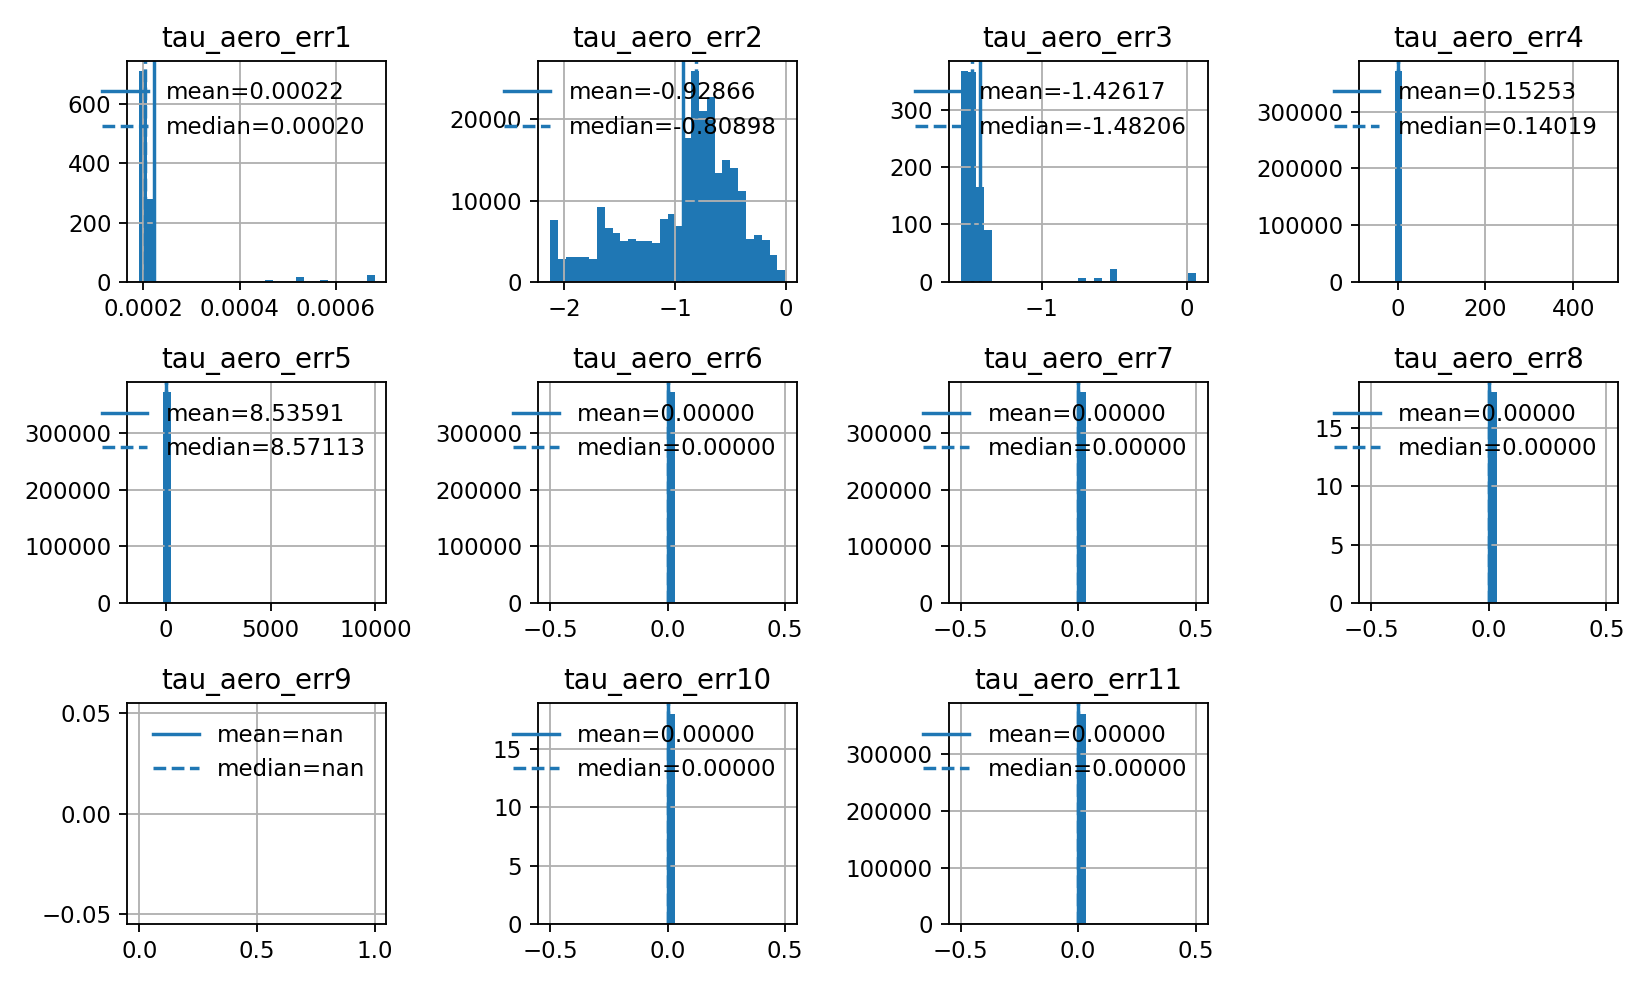

<ipython-input-49-f4f882ac681f>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  sss = s6[lbl][ig,i380].astype(float)
<ipython-input-49-f4f882ac681f>:11: RuntimeWarning: Mean of empty slice
  ax[i].axvline(np.nanmean(sss),linestyle='-',label='mean={:1.5f}'.format(np.nanmean(sss)))


In [49]:
fig,ax = plt.subplots(3,4,figsize=(10,6))
ax = ax.ravel()
for i in range(11):
    lbl = 'tau_aero_err{:1.0f}'.format(i+1)
    try:
        ig = np.isfinite(s6[lbl][:,i380])
        sss = s6[lbl][ig,i380].astype(float)
    except IndexError:
        sss = s6[lbl].astype(float)
    ax[i].hist(sss,bins=30)
    ax[i].axvline(np.nanmean(sss),linestyle='-',label='mean={:1.5f}'.format(np.nanmean(sss)))
    ax[i].axvline(np.nanmedian(sss),linestyle='--',label='median={:1.5f}'.format(np.nanmedian(sss)))
    ax[i].legend(frameon=False)
    ax[i].set_title(lbl)
    ax[i].grid()
ax[11].axis('off')
plt.tight_layout()

In [40]:
ax = ax.ravel()

In [49]:
np.max(sp6['20160824'][lbl][np.isfinite(sp6['20160824'][lbl][:,i500]),i500])

8.868873

In [52]:
sp6[ds][lbl].shape

(1, 1)